<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_ml/ml06_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy  # 과학기술, 공학용 패키지(배열, 특수함수). 
# scipy.special.expit(), scipy.special.softmax() 함수

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Data

In [2]:
fish_file = 'https://github.com/JakeOh/202011_itw_bd21/raw/main/datasets/Fish.csv'

In [3]:
df = pd.read_csv(fish_file)

In [4]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
np.unique(df['Species'])

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

# 이진 분류(binary-class classification)

In [7]:
# df에서 Bream, Smelt 어종만 선택
bream_smelt = df[(df['Species'] == 'Bream') | (df['Species'] == 'Smelt')]

In [8]:
bream_smelt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length1  49 non-null     float64
 3   Length2  49 non-null     float64
 4   Length3  49 non-null     float64
 5   Height   49 non-null     float64
 6   Width    49 non-null     float64
dtypes: float64(6), object(1)
memory usage: 3.1+ KB


## DF -> Array

In [9]:
# data
X = bream_smelt[['Weight', 'Length2', 'Height', 'Width']].to_numpy()
# target
y = bream_smelt['Species'].values

In [10]:
X.shape

(49, 4)

In [11]:
X[:5]

array([[242.    ,  25.4   ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  12.444 ,   5.134 ]])

In [12]:
y.shape

(49,)

In [13]:
y[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## train/test 분리

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [15]:
X_train.shape

(36, 4)

In [17]:
y_train.shape

(36,)

## kNN 분류

### 특성 스케일링

In [18]:
std_scaler = StandardScaler()  # z = (x - mean) / std

In [19]:
# 훈련 셋에서 특성들의 평균과 표준편차를 찾고(fit), 특성들의 스케일을 변환(transform)
X_train_scaled = std_scaler.fit_transform(X_train)

In [20]:
# 훈련 셋에서 찾은 평균과 표준편차를 사용해서, 테스트 셋의 특성들의 스케일을 변환(transform)
X_test_scaled = std_scaler.transform(X_test)

In [22]:
np.mean(X_train_scaled, axis=0)

array([-8.94346325e-17, -5.24271984e-17,  1.29526020e-16,  5.48943607e-16])

In [23]:
np.std(X_train_scaled, axis=0)

array([1., 1., 1., 1.])

### 모델 생성, 훈련

In [32]:
knn_clf = KNeighborsClassifier(n_neighbors=5)  # 모델 생성

In [33]:
knn_clf.fit(X_train_scaled, y_train)  # 모델 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [34]:
train_pred = knn_clf.predict(X_train_scaled)
train_pred

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [35]:
y_train

array(['Bream', 'Bream', 'Smelt', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream'], dtype=object)

In [36]:
knn_clf.score(X_train_scaled, y_train)

1.0

In [37]:
# kNN 분류기 가장 가까운 k개의 이웃들의 어종의 비율로 예측.
knn_clf.predict_proba(X_train_scaled)  # predict probability(예측 확률)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [38]:
# 테스트 셋의 예측 확률
knn_clf.predict_proba(X_test_scaled)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

# 다중 클래스 분류(multi-class classification)

In [39]:
X = df[['Weight', 'Length2', 'Width', 'Height']].to_numpy()
y = df['Species'].values

In [40]:
X.shape

(159, 4)

In [41]:
y.shape

(159,)

## train/test split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [43]:
std_scaler = StandardScaler()

In [44]:
# 특성 스케일링
X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

## 모델 훈련, 평가

In [45]:
knn_clf = KNeighborsClassifier()  # 모델 생성

In [46]:
knn_clf.fit(X_train_scaled, y_train)  # 모델 학습

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
knn_clf.score(X_train_scaled, y_train)  # 훈련 셋의 정확도

0.8403361344537815

In [48]:
train_pred = knn_clf.predict(X_train_scaled)  # 훈련 셋의 예측값
train_pred[:10]

array(['Perch', 'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Bream', 'Perch', 'Parkki'], dtype=object)

In [49]:
y_train[:10]  # 실제값(타겟)

array(['Roach', 'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Perch',
       'Bream', 'Whitefish', 'Bream'], dtype=object)

In [50]:
# 훈련 셋의 예측 확률
train_prob = knn_clf.predict_proba(X_train_scaled)
train_prob[:3]

array([[0. , 0. , 0.6, 0. , 0.4, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. ],
       [1. , 0. , 0. , 0. , 0. , 0. , 0. ]])

In [51]:
np.unique(y)

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [52]:
train_prob[7:10]

array([[1. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.4, 0. , 0.2, 0. , 0.4],
       [0.4, 0.6, 0. , 0. , 0. , 0. , 0. ]])

# sigmoid 함수


$\phi (z) = \dfrac{e^z}{1 + e^z} = \dfrac{1}{1 + e^{-z}} $


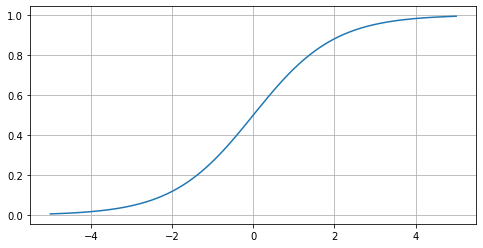

In [54]:
z = np.arange(-5, 5, 0.001)
# sigmoid = 1 / (1 + np.exp(-z))
sigmoid = scipy.special.expit(z)

plt.figure(figsize=(8, 4))
plt.plot(z, sigmoid)

plt.grid()
plt.show()

# Logistic Regression

Logistic Regression = Linear Regression + Sigmoid 함수 => 확률 추정

선형 회귀
>   $ z = w_0 + \sum_{i} x_i \cdot w_i = w_0 + x_1 w_1 + x_2 w_2 + ...$

Sigmoid 함수
>   $ \phi (z) = \dfrac{1}{1 + exp(-z)} = \dfrac{1}{1 + exp(-(w_0 + \sum_{i} x_i \cdot w_i))} $